In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [2]:
!nvidia-smi

Wed Apr 23 22:45:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   59C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!apt-get update -y
!apt-get install -y cuda-12-4

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [4,272 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,543 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main am

In [4]:
!ls /usr/local/ | grep cuda

cuda
cuda-12
cuda-12.4
cuda-12.5


In [5]:
!sudo rm -rf /usr/local/cuda
!sudo ln -s /usr/local/cuda-12.4 /usr/local/cuda

In [6]:
!export PATH=/usr/local/cuda-12.4/bin:$PATH
!export LD_LIBRARY_PATH=/usr/local/cuda-12.4/lib64:$LD_LIBRARY_PATH

In [7]:
!echo $PATH
!echo $LD_LIBRARY_PATH

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin
/usr/lib64-nvidia


In [8]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Mar_28_02:18:24_PDT_2024
Cuda compilation tools, release 12.4, V12.4.131
Build cuda_12.4.r12.4/compiler.34097967_0
Wed Apr 23 22:56:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8      

In [9]:
!pip install nvcc4jupyter

In [10]:
%load_ext nvcc4jupyter

Detected platform "Colab". Running its setup...
Source files will be saved in "/tmp/tmpr1anws0m".


In [11]:
!nvidia-smi

Wed Apr 23 22:56:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [12]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Mar_28_02:18:24_PDT_2024
Cuda compilation tools, release 12.4, V12.4.131
Build cuda_12.4.r12.4/compiler.34097967_0


#**Lista de Exercícios 2**

**1. Descreva como os Processadores de Fluxo (SP) e espaços de memória são
organizados numa GPGPU.**

Em uma GPGPU, os Streaming Processors(SPs) ou Processadores de Fluxo executam uma thread por warp. Um conjunto de SPs formam o Streaming Multiprocessors(SM) que executam varias threads ao mesmo tempo. Graças as essas paralelizações com SPs presentes em SM que conseguimos o bom desempenho de GPUs

Ja as memorias, apresentam uma hierarquia.
1. Registradores: Ficam em cada thread, apresentam latencia baixa, muito rapidos
2. Memoria Local: Latencia alta, fica DRAM global de processamento
3. Shared Memory: Muito rapida, fica dentro de block. As threads compartilham essa memoria
4. Memoria Global: Compartilhada entre cada bloco, latencia maior que as demais ja citadas
5. Memoria Constante: Geralmente fica dados imutaveis que todas as threads utilizam

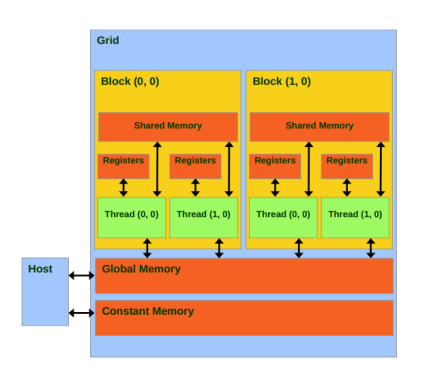

**2. Como são organizados os threads, blocos e grids em CUDA? Mostre como um
kernel CUDA é invocado em CUDA-C (linguagem C com CUDA).**

1. Threads:

  * Cada thread executa uma cópia do kernel.
  * Identificadas por threadIdx.x, threadIdx.y, threadIdx.z dentro de seu bloco.

2. Blocos:

  * Agrupam threads que podem cooperar via memória compartilhada e sincronização (__syncthreads()).
  * Dimensões definidas por blockDim.x, blockDim.y, blockDim.z

3. Grids:

  * Coleção de blocos que executam o mesmo kernel.
  * Dimensões definidas por gridDim.x, gridDim.y, gridDim.z.

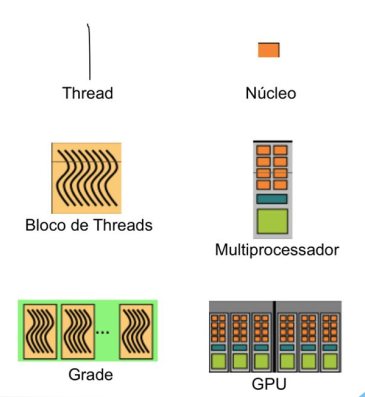

In [13]:
%%cuda
#include <stdio.h>

__global__ void myKernel() {
    int idx = threadIdx.x + blockIdx.x * blockDim.x;
    printf("Thread %d (Bloco %d)\n", threadIdx.x, blockIdx.x);
}

int main() {
    dim3 threadsPerBlock(16);  // 16 threads/bloco
    dim3 numberOfBlocks(3);    // 3 blocos

    myKernel<<<numberOfBlocks, threadsPerBlock>>>();
    cudaDeviceSynchronize();
    return 0;
}

Thread 0 (Bloco 2)
Thread 1 (Bloco 2)
Thread 2 (Bloco 2)
Thread 3 (Bloco 2)
Thread 4 (Bloco 2)
Thread 5 (Bloco 2)
Thread 6 (Bloco 2)
Thread 7 (Bloco 2)
Thread 8 (Bloco 2)
Thread 9 (Bloco 2)
Thread 10 (Bloco 2)
Thread 11 (Bloco 2)
Thread 12 (Bloco 2)
Thread 13 (Bloco 2)
Thread 14 (Bloco 2)
Thread 15 (Bloco 2)
Thread 0 (Bloco 0)
Thread 1 (Bloco 0)
Thread 2 (Bloco 0)
Thread 3 (Bloco 0)
Thread 4 (Bloco 0)
Thread 5 (Bloco 0)
Thread 6 (Bloco 0)
Thread 7 (Bloco 0)
Thread 8 (Bloco 0)
Thread 9 (Bloco 0)
Thread 10 (Bloco 0)
Thread 11 (Bloco 0)
Thread 12 (Bloco 0)
Thread 13 (Bloco 0)
Thread 14 (Bloco 0)
Thread 15 (Bloco 0)
Thread 0 (Bloco 1)
Thread 1 (Bloco 1)
Thread 2 (Bloco 1)
Thread 3 (Bloco 1)
Thread 4 (Bloco 1)
Thread 5 (Bloco 1)
Thread 6 (Bloco 1)
Thread 7 (Bloco 1)
Thread 8 (Bloco 1)
Thread 9 (Bloco 1)
Thread 10 (Bloco 1)
Thread 11 (Bloco 1)
Thread 12 (Bloco 1)
Thread 13 (Bloco 1)
Thread 14 (Bloco 1)
Thread 15 (Bloco 1)



**3. Por que o uso de comandos if dentro de kernels CUDA pode afetar negativamente o
desempenho de aplicações CUDA-C?**

O uso de comandos if pode causar "warp divergence", um fenômeno onde threads do mesmo warp seguem caminhos de execução diferentes. Como as threads de um warp executam instruções em lockstep, o hardware é forçado a processar cada ramo condicional separadamente, desativando as threads que não participam do ramo atual.

 Se metade das threads de um warp entra em um if e a outra metade no else, o warp executará primeiro o bloco if (com metade das threads ativas) e depois o else (com a outra metade), dobrando efetivamente o tempo de execução para esse warp. Isso reduz a eficiência do paralelismo, porque diminui a ocupação do SM

**4. Implemente um código para inicializar um vetor com 4.000 posições com um valor
passado como parâmetro. Eleve todos os valores nos índices pares ao quadrado e os
valores nos índices ímpares à terceira potência. Em seguida, implemente uma
função sequencial que retorne se as operações foram realizadas com sucesso ou se
houve falha. Obs.: número de blocos = 8 e número de threads igual a 512 por bloco.**

In [18]:
%%cuda
#include <stdio.h>
#include <assert.h>
#include <math.h>

__global__ void initVector(int *arr, int N, int value) {
    int idx = threadIdx.x + blockIdx.x * blockDim.x;
    if (idx < N) {
        arr[idx] = value;
    }
}

__global__ void processVector(int *arr, int N) {
    int idx = threadIdx.x + blockIdx.x * blockDim.x;
    if (idx < N) {
        if (idx % 2 == 0) {
            arr[idx] = pow(arr[idx],2);
        } else {
            arr[idx] = pow(arr[idx],3);
        }
        printf("Thread %d (Bloco %d): arr[%d] = %d\n", threadIdx.x, blockIdx.x, idx, arr[idx]);
    }
}

bool checkSuccess(int *arr, int N, int initialValue) {
    for (int i = 0; i < N; i++) {
        int expected;
        if (i % 2 == 0) {
            expected = pow(initialValue,2);
        } else {
            expected = pow(initialValue,3);
        }
        if (arr[i] != expected) {
            printf("Erro na posição %d: Esperado %d, Obtido %d\n", i, expected, arr[i]);
            return false;
        }
    }
    return true;
}

int main() {
    const int N = 4000;
    const int initialValue = 81;
    int *arr;

    cudaMallocManaged(&arr, N * sizeof(int));

    int threadsPerBlock = 512;
    int numberOfBlocks = 8;

    initVector<<<numberOfBlocks, threadsPerBlock>>>(arr, N, initialValue);
    cudaDeviceSynchronize();

    processVector<<<numberOfBlocks, threadsPerBlock>>>(arr, N);
    cudaDeviceSynchronize();

    if (checkSuccess(arr, N, initialValue)) {
        printf("Sucesso!\n");
    } else {
        printf("Falha!\n");
    }

    cudaFree(arr);
    return 0;
}

Thread 320 (Bloco 7): arr[3904] = 6561
Thread 321 (Bloco 7): arr[3905] = 531441
Thread 322 (Bloco 7): arr[3906] = 6561
Thread 323 (Bloco 7): arr[3907] = 531441
Thread 324 (Bloco 7): arr[3908] = 6561
Thread 325 (Bloco 7): arr[3909] = 531441
Thread 326 (Bloco 7): arr[3910] = 6561
Thread 327 (Bloco 7): arr[3911] = 531441
Thread 328 (Bloco 7): arr[3912] = 6561
Thread 329 (Bloco 7): arr[3913] = 531441
Thread 330 (Bloco 7): arr[3914] = 6561
Thread 331 (Bloco 7): arr[3915] = 531441
Thread 332 (Bloco 7): arr[3916] = 6561
Thread 333 (Bloco 7): arr[3917] = 531441
Thread 334 (Bloco 7): arr[3918] = 6561
Thread 335 (Bloco 7): arr[3919] = 531441
Thread 336 (Bloco 7): arr[3920] = 6561
Thread 337 (Bloco 7): arr[3921] = 531441
Thread 338 (Bloco 7): arr[3922] = 6561
Thread 339 (Bloco 7): arr[3923] = 531441
Thread 340 (Bloco 7): arr[3924] = 6561
Thread 341 (Bloco 7): arr[3925] = 531441
Thread 342 (Bloco 7): arr[3926] = 6561
Thread 343 (Bloco 7): arr[3927] = 531441
Thread 344 (Bloco 7): arr[3928] = 6561
T

**5. Proponha uma solução paralela em CUDA para o cálculo da seguinte expressão
vetorial: V=k1*A+k2*(B+C), onde k1 e k2 são constantes definidas pelo
programador e A, B e C são vetores de tamanho n=5000. Utilize n_blocos=8 e
n_threads=16. Inicialize os vetores A e B de forma paralela e com valores
arbitrários (definidos pelo programador). Imprima o vetor V.**

In [22]:
%%cuda
#include <stdio.h>

__global__ void initVector(float *vec, float start, float step, int N) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    for (int i = idx; i < N; i += blockDim.x * gridDim.x) {
        vec[i] = start + i * step;
    }
}

__global__ void calcExpression(float *V, float *A, float *B, float *C, int N, float k1, float k2) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    for (int i = idx; i < N; i += blockDim.x * gridDim.x) {
        V[i] = k1 * A[i] + k2 * (B[i] + C[i]);
    }
}

int main() {
    const int N = 5000;
    const float k1 = 1.0f, k2 = 2.0f;
    const int threadsPerBlock = 16;
    const int numberOfBlocks = 8;

    float *A, *B, *C, *V;

    cudaMallocManaged(&A, N * sizeof(float));
    cudaMallocManaged(&B, N * sizeof(float));
    cudaMallocManaged(&C, N * sizeof(float));
    cudaMallocManaged(&V, N * sizeof(float));

    initVector<<<numberOfBlocks, threadsPerBlock>>>(A, 1.0f, 1.0f, N); // A[i] = 1 + i
    initVector<<<numberOfBlocks, threadsPerBlock>>>(B, 2.0f, 2.0f, N); // B[i] = 2 + 2i
    initVector<<<numberOfBlocks, threadsPerBlock>>>(C, 3.0f, 3.0f, N); // C[i] = 3 + 3i
    cudaDeviceSynchronize();

    calcExpression<<<numberOfBlocks, threadsPerBlock>>>(V, A, B, C, N, k1, k2);
    cudaDeviceSynchronize();

    printf("Primeiros 50 elementos de V:\n");
    printf("[");
    for (int i = 0; i < 50; i++) {
        printf("%.2f, ", V[i]);
    }
    printf("]");

    cudaFree(A);
    cudaFree(B);
    cudaFree(C);
    cudaFree(V);

    return 0;
}

Primeiros 10 elementos de V:
[11.00, 22.00, 33.00, 44.00, 55.00, 66.00, 77.00, 88.00, 99.00, 110.00, 121.00, 132.00, 143.00, 154.00, 165.00, 176.00, 187.00, 198.00, 209.00, 220.00, 231.00, 242.00, 253.00, 264.00, 275.00, 286.00, 297.00, 308.00, 319.00, 330.00, 341.00, 352.00, 363.00, 374.00, 385.00, 396.00, 407.00, 418.00, 429.00, 440.00, 451.00, 462.00, 473.00, 484.00, 495.00, 506.00, 517.00, 528.00, 539.00, 550.00, ]


**6. Explique o funcionamento do programa CUDA-C abaixo. Como o desempenho
deste programa pode ser melhorado?**

- **Objetivo**: Ordenar um array de entrada (data) e armazenar o resultado em um array de saída (outdata).

- Inicialização: O array a é definido em ordem decrescente ({15, 14, ..., 0}).

- Alocação de Memória na GPU: cudaMalloc aloca espaço para os arrays ad (entrada) e bd (saída).

- Transferência de Dados: cudaMemcpy copia os dados da CPU para a GPU.

- Execução do Kernel:

  - Cada thread CUDA processa um elemento do array de entrada (data[ix], onde ix é o índice global da thread).

  - Para cada elemento, a thread conta quantos elementos no array são menores que ele (p++).

  - O elemento é então colocado na posição p do array de saída (outdata[p] = data[ix]), garantindo que elementos maiores ocupem posições mais altas.


- Recuperação do Resultado: O array ordenado é copiado de volta para a CPU e impresso.

###Problemas de Desempenho
1. Complexidade Algorítmica (O(n²)):

  - Cada thread compara seu elemento com todos os outros elementos do array. Para N = 16, são realizadas 16² = 256 comparações.

  - Pode se tentar usar um merge sort para melhorar.

2. Acesso à Memória Global:

  - Cada comparação (data[i]) requer acesso à memória global

  - Não há uso de memória compartilhada ou cache, o que reduz drasticamente a velocidade.

3. Divergência de Warps:

  - As threads em um mesmo warp podem estar em iterações diferentes do loop for, causando serialização da execução.


4. Colisões no Array de Saída:

  - Se dois elementos forem iguais, ambos tentarão escrever na mesma posição outdata[p], causando sobrescrita.

5. Acesso coalescidos a memoria:
  - permitir que threads adjacentes acessem posicao de memoria adjacente.

In [24]:
%%cuda
#include <stdio.h>

const int N = 16;
const int blocksize = 4;


__global__ void kernel(int *data, int *outdata, int N) {
    int p = 0;
    int i, ix;

    ix = blockIdx.x * blockDim.x + threadIdx.x;

    for (i = 0; i < N; i++) {
        if (data[ix] > data[i]) {
            p++;  // Incrementa o contador para cada elemento menor
        }
    }

    outdata[p] = data[ix];
}

int main() {
    int a[N] = {15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0};
    int b[N] = {0};


    int isize = N * sizeof(int);
    int *ad, *bd;

    cudaMalloc((void**)&ad, isize);
    cudaMalloc((void**)&bd, isize);


    cudaMemcpy(ad, a, isize, cudaMemcpyHostToDevice);
    cudaMemcpy(bd, b, isize, cudaMemcpyHostToDevice);

    kernel<<<N/blocksize, blocksize>>>(ad, bd, N);

    cudaMemcpy(b, bd, isize, cudaMemcpyDeviceToHost);

    cudaFree(ad);
    cudaFree(bd);

    printf("Array ordenado: ");
    for (int i = 0; i < N; i++) {
        printf("%d ", b[i]);
    }
    printf("\n");

    return EXIT_SUCCESS;
}

Array ordenado: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 



**7. Considere que o programa a seguir deve não apenas iniciar um kernel CUDA para adicionar dois vetores em um terceiro vetor, todos alocados com
cudaMallocManaged, mas também inicializar cada um dos três vetores em paralelo
em um kernel CUDA. Realize experimentos usando cudaMemPrefetchAsync no programa abaixo para verificar seu impacto na falha de página e migração de memória.**

* **a) O que acontece quando você realiza o prefetch (pré-busca) em apenas um dos
vetores inicializados para o dispositivo (vetor a)?**
* **b) O que acontece quando você realiza o prefetch em dois dos vetores inicializados para o dispositivo (vetores a e b)?**
* **c) O que acontece quando você realiza o prefetch em todos os três vetores
inicializados para o dispositivo (vetores a, b e c)?**
* **d) Crie hipóteses sobre o comportamento da Memória Unificada (UM), falhas de
página especificamente, bem como o impacto no tempo de execução relatado do
kernel de inicialização, antes de cada experimento e, em seguida, verifique
executando o comando nvprof.**
* **e) Adicione prefetch adicional de volta à CPU para a função que verifica a correção do kernel addVectorInto. Novamente, crie uma hipótese sobre o impacto na
Memória Unificada (UM) antes de executar o nvprof para validar sua hipótese.**

In [30]:
%%cuda
#include <stdio.h>

__global__ void initVector(float *vec, float value, int N) {
    int index = threadIdx.x + blockIdx.x * blockDim.x;
    int stride = blockDim.x * gridDim.x;
    for(int i = index; i < N; i += stride) {
        vec[i] = value;
    }
}

__global__ void addVectorsInto(float *result, float *a, float *b, int N) {
    int index = threadIdx.x + blockIdx.x * blockDim.x;
    int stride = blockDim.x * gridDim.x;
    for(int i = index; i < N; i += stride) {
        result[i] = a[i] + b[i];
    }
}

void checkElementsAre(float target, float *vector, int N) {
    for(int i = 0; i < N; i++) {
        if(vector[i] != target) {
            printf("FAIL: vector[%d] - %0.0f does not equal %0.0f\n", i, vector[i], target);
            exit(1);
        }
    }
    printf("Success! All values calculated correctly.\n");
}

int main() {
    const int N = 2<<24;
    size_t size = N * sizeof(float);
    int deviceId;
    cudaGetDevice(&deviceId);

    float *a, *b, *c;
    cudaMallocManaged(&a, size);
    cudaMallocManaged(&b, size);
    cudaMallocManaged(&c, size);

    size_t threadsPerBlock = 256;
    size_t numberOfBlocks = (N + threadsPerBlock - 1) / threadsPerBlock;

    // --- Experimento (a): Prefetch apenas para 'a' ---
    cudaMemPrefetchAsync(a, size, deviceId);  // Pré-carrega 'a' na GPU
    // cudaMemPrefetchAsync(b, size, deviceId);  // Descomente para (b)
    // cudaMemPrefetchAsync(c, size, deviceId);  // Descomente para (c)

    // Inicialização paralela
    initVector<<<numberOfBlocks, threadsPerBlock>>>(a, 3.0, N);
    initVector<<<numberOfBlocks, threadsPerBlock>>>(b, 4.0, N);
    initVector<<<numberOfBlocks, threadsPerBlock>>>(c, 0.0, N);
    cudaDeviceSynchronize();

    // Soma dos vetores
    addVectorsInto<<<numberOfBlocks, threadsPerBlock>>>(c, a, b, N);
    cudaDeviceSynchronize();

    // Pré-carrega 'c' de volta para a CPU antes da verificação
    cudaMemPrefetchAsync(c, size, cudaCpuDeviceId);  // Para (e)

    checkElementsAre(7.0, c, N);

    cudaFree(a);
    cudaFree(b);
    cudaFree(c);
    return 0;
}

SyntaxError: invalid syntax (<ipython-input-30-18a79bc6ea9b>, line 5)

In [35]:
!nvprof --unified-memory-profiling per-process-device --print-gpu-trace

======== Error: no application specified.


Caso (a): Alta contagem de pagefaults para b e c. Padrao de Migração, os dados são transferidos sob demando do host para o devide, na verificacao o inverso

Caso (b): pagefaults reduzidos para a, mas presentes em b e c. Vetor c ainda sofre problema de migracao

Caso (c): pagefaults em c. vetor C ainda sobre problema de migracao

Caso (d): antes de rodar cada experimento espera-se que o pré-carregamento via cudaMemPrefetchAsync traga imediatamente para a GPU as páginas dos vetores indicados, reduzindo ou eliminando as falhas de página (page faults) e, portanto, acelerando o kernel de inicialização proporcionalmente ao volume de dados já migrados; quanto mais vetores você pré-buscar (de um até os três), menor será o overhead de migração sob demanda e mais rápido será o initVector, enquanto sem nenhum prefetch ou com prefetch parcial os vetores não pré-carregados sofrerão page faults na primeira escrita, atrasando significativamente a execução.

Caso (e): ao pré-carregar c para a CPU, checkElementsAre não provoca nenhum page fault de GPU→CPU, eliminando migrações on-demand durante a leitura em host e reduzindo significativamente os stalls da memória unificada, o que deve resultar em tempos de verificação mais baixos e consistentes